<b>I have used below technique in this notebook to train the model on sentiments-</b>

<li>Removed Stopwords
<li>Removed special charectors
<li>Apply stemming to convert each word in its base form
<li>Used NLTK BOW technique
<li>Used Scikit learn Bag of Word bigram model to convert reviews in vector form
<li>Used Scikit learn TF-IDF bigram model to convert reviews in vector form
<li>Applied Naive Bays classifier
<li>Applied Random Forest Classifier
<li>Used Accuracy, Precision Recall, F1-Score and Confusion matrix

In [1]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

sno=SnowballStemmer('english')
english_stopwords=stopwords.words('english')

<h3>Remove "not" from stopwords list as it might be an important word in negative reviews</h3>

In [2]:
english_stopwords=[word for word in english_stopwords if word != 'not']

In [3]:
documents = []

In [33]:
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((list(movie_reviews.words(fileid)), category))

In [34]:
print(documents[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

<h1>Below is the process to clean all reviews</h1>

<h1>Remove punctuation and stopwords and apply stemming in all reviewes. Select only those words in reviws which are greater than 2 in length</h1>

In [35]:
#########################
specal_chars=[",","@","?","."," ","/","\\","(",")","<",">","-","_",'"','!','*','=']

cleaned_documents=[]
for doc,cat in documents:
    w_list=[]
    for word in doc:
        if(word not in english_stopwords and word not in specal_chars and len(word)>2):
            w_list.append(sno.stem(word))
    cleaned_documents.append((w_list,cat))

########################

In [36]:
print(cleaned_documents[0])

(['plot', 'two', 'teen', 'coupl', 'church', 'parti', 'drink', 'drive', 'get', 'accid', 'one', 'guy', 'die', 'girlfriend', 'continu', 'see', 'life', 'nightmar', 'deal', 'watch', 'movi', 'sorta', 'find', 'critiqu', 'mind', 'fuck', 'movi', 'teen', 'generat', 'touch', 'cool', 'idea', 'present', 'bad', 'packag', 'make', 'review', 'even', 'harder', 'one', 'write', 'sinc', 'general', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'make', 'type', 'film', 'folk', 'snag', 'one', 'correct', 'seem', 'taken', 'pretti', 'neat', 'concept', 'execut', 'terribl', 'problem', 'movi', 'well', 'main', 'problem', 'simpli', 'jumbl', 'start', 'normal', 'downshift', 'fantasi', 'world', 'audienc', 'member', 'idea', 'go', 'dream', 'charact', 'come', 'back', 'dead', 'other', 'look', 'like', 'dead', 'strang', 'apparit', 'disappear', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simpli', 'not', 'explain', 'person', 'mind', 'tri', 

<h1>shuffle reviews to distribute them randomly</h1>

In [37]:
random.shuffle(cleaned_documents)

<h1>below i am selecing all clean words of this corpus</h1>

<h2>Remove stopwords, special charectors and apply stemming, only selct words which are greater than 2 in length and create a word_feature 5000 most frequent word</h2>

In [38]:
all_words = []
for w in movie_reviews.words():
    word= w.lower()
    if(word not in english_stopwords and word not in specal_chars and len(word)>2):
        all_words.append(sno.stem(w.lower()))

In [39]:
#all_words = nltk.FreqDist(all_words)

<h1>select top 10000 words</h1>
here i have selected 10000 words but in model i have just used 7000 out of it.

In [40]:
def find_most_common(words_list,top):
    words_freq_dist=nltk.FreqDist(words_list)
    common=words_freq_dist.most_common(top)
    word=[res[0] for res in common]
    freq=[res[1] for res in common]
    return word,freq

all_common_words,freq=find_most_common(all_words,10000)

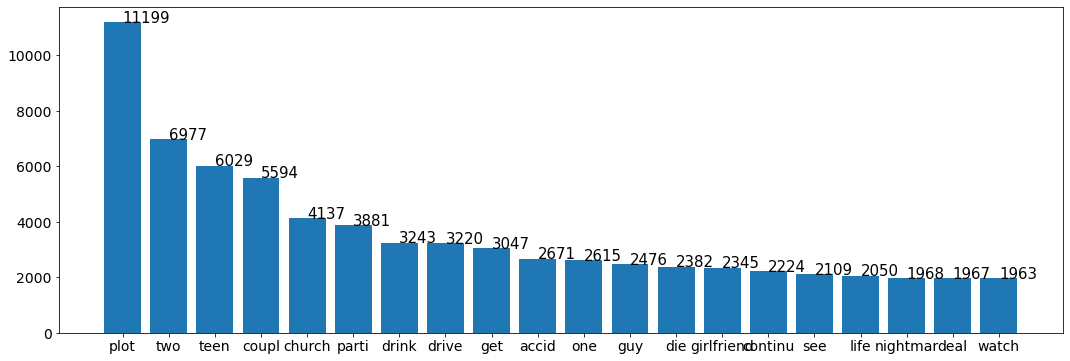

In [41]:
def plot_most_common(word_list,freq_list):
    fig= plt.figure(figsize=(18,6))
    plt.bar(word_list,freq_list)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    for xy in zip(word_list,freq_list):
        plt.annotate(xy[1],xy=xy,fontsize=15)

    plt.show()

plot_most_common(all_words[:20],freq[:20])

In [42]:
##word_features = all_words[:5000]
word_features = all_common_words[:7000]

<h1>below fuction will ceate a dictionary w.r.t each review.</h1>
We will check which all words of Word_Feature exist in review as well and assign True to it if it exist in the review otherwise it will be assigned False. Same process we will repeat for all reviews in our dataset. So eventually the size of Feature set obtained by this process will be N x M (N is no of review and M is length of Word_Feature).

In [43]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [44]:
featuresets = [(find_features(rev), category) for (rev, category) in cleaned_documents]

In [45]:
print(featuresets[0][0])

{'film': True, 'movi': True, 'one': True, 'not': True, 'like': True, 'charact': True, 'make': True, 'get': True, 'time': True, 'scene': True, 'even': True, 'good': False, 'play': False, 'stori': True, 'see': True, 'would': False, 'much': True, 'well': True, 'also': True, 'seem': True, 'two': True, 'look': False, 'way': False, 'end': True, 'first': False, 'take': False, 'come': True, 'year': False, 'work': False, 'thing': False, 'plot': False, 'life': False, 'know': True, 'realli': True, 'perform': True, 'littl': True, 'bad': False, 'peopl': True, 'love': False, 'could': True, 'man': False, 'star': True, 'never': True, 'show': True, 'tri': True, 'director': True, 'best': True, 'new': False, 'give': False, 'mani': True, 'action': False, 'actor': True, 'want': False, 'say': False, 'great': False, 'watch': False, 'find': False, 'use': True, 'think': False, 'becom': False, 'role': True, 'act': True, 'anoth': True, 'back': False, 'effect': True, 'made': True, 'audienc': True, 'world': False,

<h1>devide training and testing dataset in 90:10 ratio </h1>

In [46]:
train_length=int(len(featuresets)*.90)

In [47]:
training_set = featuresets[:train_length]
testing_set = featuresets[train_length:]

<h1>Apply NaiveBayesClassifier on training set</h1>

In [48]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

<h1>seperate target label from testing set</h1>

In [49]:
testing_set_content=[i[0] for i in testing_set]
golden_label=[i[1] for i in testing_set]

<h1>Predict testset</h1>

In [50]:
tested_label=classifier.classify_many(testing_set_content)

<h1>Check Performence</h1>

<h1>Accuracy</h1>

In [51]:
nltk.classify.accuracy(classifier, testing_set)*100

83.25

<h1>Confusion Matrix</h1>

In [52]:
cm = confusion_matrix(golden_label, tested_label) 

In [53]:
print(cm)

[[161  16]
 [ 51 172]]


<h1>Precision</h1>

In [54]:
precision_score(golden_label, tested_label,average='weighted')

0.8461027197912485

<h1>Recall</h1>

In [55]:
recall_score(golden_label, tested_label,average='weighted')

0.8325

<h1>F1-Score</h3>

In [56]:
f1_score(golden_label, tested_label,average='weighted')

0.8329033519098821

<h3>Important Features as per this model</h3>

In [57]:
classifier.show_most_informative_features(100)

Most Informative Features
                  predat = True              neg : pos    =     18.5 : 1.0
                  annual = True              pos : neg    =     16.8 : 1.0
                 incoher = True              neg : pos    =     16.6 : 1.0
                    plod = True              neg : pos    =     14.6 : 1.0
                  ballad = True              pos : neg    =     14.0 : 1.0
               behaviour = True              pos : neg    =     14.0 : 1.0
                    lore = True              pos : neg    =     14.0 : 1.0
              silverston = True              neg : pos    =     14.0 : 1.0
                  atroci = True              neg : pos    =     13.5 : 1.0
             overwrought = True              neg : pos    =     13.3 : 1.0
                    3000 = True              neg : pos    =     12.3 : 1.0
                astronom = True              pos : neg    =     12.0 : 1.0
                    hatr = True              pos : neg    =     11.7 : 1.0

<h1>Random Forest Classifier</h1>

In [58]:
print(cleaned_documents[0])

(['film', 'magnolia', 'compar', 'simpl', 'flower', 'titl', 'movi', 'poster', 'suggest', 'dozen', 'charact', 'introduc', 'develop', 'like', 'petal', 'flower', 'come', 'stem', 'flower', 'begin', 'develop', 'grow', 'farther', 'farther', 'apart', 'numer', 'charact', 'film', 'close', 'connect', 'matter', 'differ', 'one', 'anoth', 'social', 'humili', 'kind', 'cop', 'age', 'game', 'show', 'host', 'one', 'charact', 'suffer', 'kind', 'pain', 'serious', 'lone', 'seek', 'perfect', 'companion', 'end', 'loneli', 'whether', 'companion', 'distant', 'famili', 'member', 'spous', 'charact', 'beg', 'one', 'spend', 'whole', 'film', 'search', 'perfect', 'one', 'magnolia', 'clever', 'well', 'thought', 'film', 'prodigi', 'director', 'writer', 'paul', 'thoma', 'anderson', 'boogi', 'night', 'fame', 'detail', 'charact', 'analys', 'power', 'script', 'make', 'magnolia', 'memor', 'howev', 'realli', 'impress', 'even', 'though', 'ton', 'charact', 'sever', 'unrel', 'stori', 'film', 'never', 'confus', 'anderson', 'con

<h1>try combining all the word tokens. we are doing so because scikit learn TF-IDF and Count vectrizer accepts data in this format only</h1>

In [59]:
" ".join(cleaned_documents[0][0])

'film magnolia compar simpl flower titl movi poster suggest dozen charact introduc develop like petal flower come stem flower begin develop grow farther farther apart numer charact film close connect matter differ one anoth social humili kind cop age game show host one charact suffer kind pain serious lone seek perfect companion end loneli whether companion distant famili member spous charact beg one spend whole film search perfect one magnolia clever well thought film prodigi director writer paul thoma anderson boogi night fame detail charact analys power script make magnolia memor howev realli impress even though ton charact sever unrel stori film never confus anderson control transit one stori anoth stori master also know exact cut anoth subplot sinc not one magnolia scene drag long three hour film not deliv even one uninterest scene definit worth recommend fascin begin riski yet surpris satisfi end film get bore obvious anderson put lot time connect subplot ultim game six degre sep

In [60]:
review_text_list=[]
label=[]

random.shuffle(cleaned_documents)

for d,cat in cleaned_documents:
    review_text_list.append(" ".join(d))
    if(cat=='neg'):
        label.append(1)
    else:
        label.append(0)
    

In [61]:
len(review_text_list)

4000

<h1>split in 90:10 ratio</h1>

In [62]:
train_X=review_text_list[:train_length]
train_Y=label[:train_length]
test_X=review_text_list[train_length:]
test_Y=label[train_length:]

In [63]:
set(train_Y)

{0, 1}

<h1>Apply BI-Gram BOW on review text to covert them in numeric form</h1>

In [64]:
count_vect = CountVectorizer(ngram_range=(1,2)) #in scikit-learn
vect = count_vect.fit(review_text_list) 
train_xx=vect.transform(train_X)
test_xx=vect.transform(test_X)

In [65]:
clf = RandomForestClassifier()

In [66]:
clf.fit(train_xx,train_Y)

RandomForestClassifier()

In [67]:
pred=clf.predict(test_xx)

In [68]:
cm = confusion_matrix(pred, test_Y) 
print(cm)

[[191   4]
 [ 10 195]]


In [69]:
accuracy_score(pred,test_Y)

0.965

In [70]:
precision_score(test_Y, pred,average='weighted')

0.9654240150093808

In [71]:
recall_score(test_Y, pred,average='weighted')

0.965

In [72]:
f1_score(test_Y, pred,average='weighted')

0.9649947494749475

<h1>Use Bigram TF-IDF and Random Forest Classifier</h1>

In [73]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(review_text_list)

In [74]:
final_tf_idf.get_shape()

(4000, 506808)

In [75]:
train_X=final_tf_idf[:train_length]
train_Y=label[:train_length]
test_X=final_tf_idf[train_length:]
test_Y=label[train_length:]

In [76]:
clf = RandomForestClassifier()
clf.fit(train_xx,train_Y)

RandomForestClassifier()

In [77]:
pred=clf.predict(test_xx)

<h3>Accuracy</h3>

In [78]:
accuracy_score(test_Y,pred)

0.97

<h3>precision</h3>

In [80]:
precision_score(test_Y, pred,average='weighted')

0.9701910429846715

<h3>Recall</h3>

In [81]:
recall_score(test_Y, pred,average='weighted')

0.97

<h3>F1-Score</h3>

In [82]:
f1_score(test_Y, pred,average='weighted')

0.9699984999624991

<h3>Confusion Matrix</h3>

In [79]:
cm = confusion_matrix(test_Y,pred) 
print(cm)

[[193   8]
 [  4 195]]


In [83]:
features = tf_idf_vect.get_feature_names()
len(features)

506808